In [1]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt

In [2]:
start='2010-01-01'
end=dt.datetime.now()
crypto='ETH'
currency='INR'
df=pdr.DataReader(f'{crypto}-{currency}','yahoo',start=start,end=end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-11,20815.558594,19430.189453,19455.863281,20504.613281,54884332639,20504.613281
2017-11-12,20796.009766,19451.107422,20505.201172,20063.285156,105134352629,20063.285156
2017-11-13,21399.521484,20005.748047,20005.748047,20722.728516,68170861653,20722.728516
2017-11-14,22287.546875,20725.802734,20725.802734,22081.068359,69957072000,22081.068359
2017-11-15,22277.746094,21523.595703,22102.845703,21754.876953,47161182116,21754.876953


In [3]:
df.shape

(1748, 6)

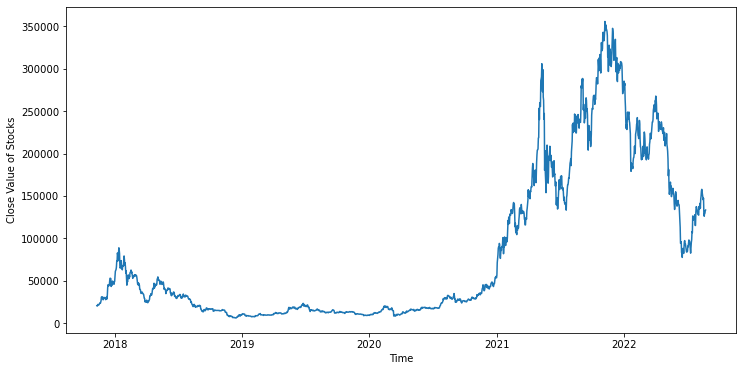

In [4]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.xlabel('Time')
plt.ylabel('Close Value of Stocks')
plt.show()

In [5]:
ma100=df['Close'].rolling(100).mean()
ma200=df['Close'].rolling(200).mean()

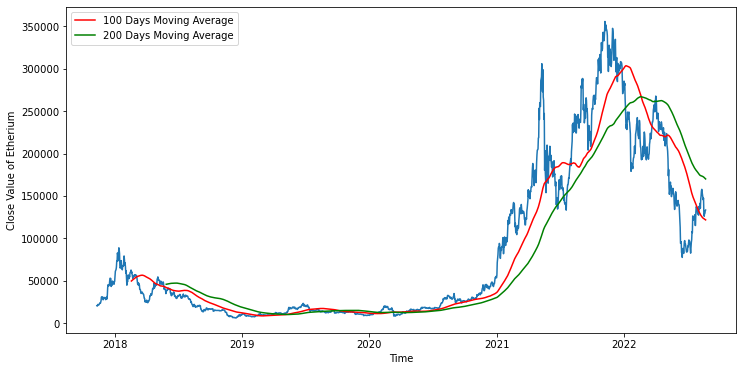

In [6]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100,'r',label='100 Days Moving Average')
plt.plot(ma200,'g',label='200 Days Moving Average')
plt.legend(loc='upper left')

plt.xlabel('Time')
plt.ylabel('Close Value of Etherium')
plt.show()

In [7]:
training_data = pd.DataFrame(df.Close[0:int(len(df)*0.70)])
test_data = pd.DataFrame(df.Close[int(len(df)*0.70): int(len(df))])

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

training_data_array=scaler.fit_transform(training_data)

In [9]:
X_train = []
y_train = []
for i in range(100, training_data_array.shape[0]):
    X_train.append(training_data_array[i-100: i])
    y_train.append(training_data_array[i, 0])
    
X_train,y_train=np.array(X_train),np.array(y_train)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [11]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1),activation='relu'))
model.add(Dropout(0.2))

model.add(LSTM(60,return_sequences=True,activation='relu'))
model.add(Dropout(0.3))

model.add(LSTM(80,return_sequences=True,activation='relu'))
model.add(Dropout(0.4))

model.add(LSTM(120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [13]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
36/36 [==============================] - 16s 254ms/step - loss: 0.0235
Epoch 2/50
36/36 [==============================] - 9s 263ms/step - loss: 0.0090
Epoch 3/50
36/36 [==============================] - 9s 259ms/step - loss: 0.0053
Epoch 4/50
36/36 [==============================] - 9s 257ms/step - loss: 0.0045
Epoch 5/50
36/36 [==============================] - 10s 270ms/step - loss: 0.0046
Epoch 6/50
36/36 [==============================] - 9s 250ms/step - loss: 0.0038
Epoch 7/50
36/36 [==============================] - 10s 270ms/step - loss: 0.0040
Epoch 8/50
36/36 [==============================] - 10s 264ms/step - loss: 0.0039
Epoch 9/50
36/36 [==============================] - 10s 268ms/step - loss: 0.0034
Epoch 10/50
36/36 [==============================] - 9s 254ms/step - loss: 0.0037
Epoch 11/50
36/36 [==============================] - 10s 268ms/step - loss: 0.0036
Epoch 12/50
36/36 [==============================] - 10s 269ms/step - loss: 0.0031
Epoch 13/50
36/36 

In [14]:
model.save('ETH_model.h5')

In [15]:
last100=training_data.tail(100)
final_df=last100.append(test_data,ignore_index=True)

C:\conda_tmp\ipykernel_808\2776311644.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=last100.append(test_data,ignore_index=True)


In [16]:
input_data=scaler.transform(final_df)

In [17]:
X_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
X_test,y_test=np.array(X_test),np.array(y_test)

In [18]:
y_predicted=model.predict(X_test)

17/17 [==============================] - 3s 87ms/step


In [19]:
scaler.scale_

array([7.34508671e-06])

In [20]:
scalefactor= 1/0.00682769
y_predicted= y_predicted*scalefactor
y_test=y_test*scalefactor

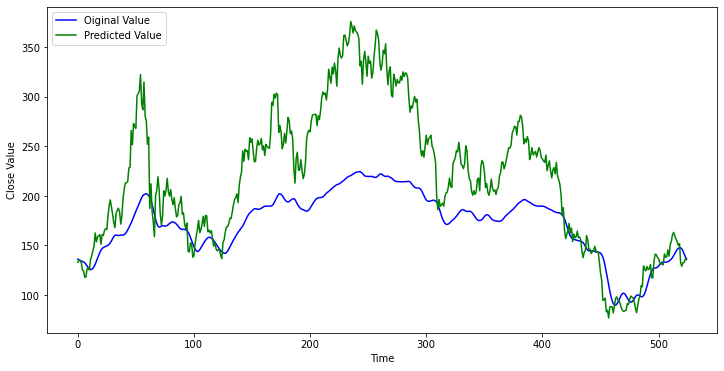

In [21]:
plt.figure(figsize=(12,6))
plt.plot(y_predicted,'b',label='Oiginal Value')
plt.plot(y_test,'g',label='Predicted Value')
plt.xlabel('Time')
plt.ylabel('Close Value')

plt.legend(loc='upper left')
plt.show()